In [200]:
from math import sqrt
from random import seed, randrange
from csv import reader

In [358]:
# read csv
with open('iris.txt', 'r') as file:
    lines = reader(file)
    dataset = list(lines)

# string to float
for j in range(len(dataset[0])-1):
    for i in range(len(dataset)):
        dataset[i][j] = float(dataset[i][j].strip())
        
# make lookup
unique = set([row[4] for row in dataset])
lookup = dict()
for i, value in enumerate(unique):
    lookup[value] = i
    
# string to integer
for i in range(len(dataset)):
    dataset[i][4] = lookup[dataset[i][4]]
    
# remove y
actual = [data[4] for data in dataset]  
dataset = [data[2:4] for data in dataset]    

In [359]:
# initialize central point
seed(1)
num_cluster = 3
central_point = dict()
for i in range(num_cluster):
    index = randrange(len(dataset))
    central_point[i] = list(dataset[index])
central_point

{0: [1.5, 0.1], 1: [5.2, 2.3], 2: [1.3, 0.4]}

In [360]:
# Eculidean distance
def euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)):
        distance += (row1[i]-row2[i])**2
    return sqrt(distance)

In [361]:
for _ in range(20):
    # set cluster
    cluster = list()
    for row in dataset:
        distances = list()
        for i in range(num_cluster):
            distances.append(euclidean_distance(row, central_point[i]))
        cluster.append(max(range(len(distances)), key=lambda i: -distances[i]))

    # get point
    cluster_point = dict()
    for i in range(num_cluster):
        cluster_point[i] = list()
        for j in range(len(cluster)):
            if cluster[j] == i:
                cluster_point[i].append(j)

    # reset central_point
    for i in range(num_cluster):
        data_cluster = [dataset[index] for index in cluster_point[i]]
        for j in range(len(dataset[0])):
            central_point[i][j] = sum(list(map(lambda row: row[j], data_cluster)))/float(len(data_cluster))
central_point

{0: [4.269230769230769, 1.342307692307692],
 1: [5.595833333333332, 2.0374999999999996],
 2: [1.464, 0.2439999999999999]}

In [362]:
# prediction
predicted = list()
for i in range(len(dataset)):
    for j in range(num_cluster):
        if i in cluster_point[j]:
            predicted.append(j)

In [406]:
import seaborn as sns
import pandas as pd
sns.set()

In [407]:
df = pd.DataFrame(dataset, columns=['A', 'B'])
df['C'] = actual
df['D'] = predicted

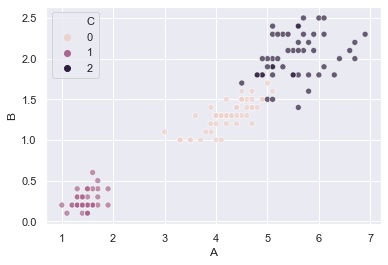

In [408]:
sns.scatterplot(
    x='A',
    y='B',
    hue='C',
    alpha=0.7,
    data=df
)
plt.show()

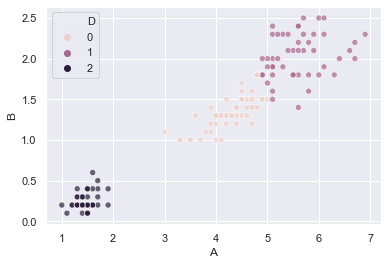

In [409]:
sns.scatterplot(
    x='A',
    y='B',
    hue='D',
    alpha=0.7,
    data=df
)
plt.show()